# Detection automatique d'un vêtement (méthode Lenet)

![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Pietro Jeng](https://unsplash.com/photos/sQVXS8HBPPc)

Dans ce projet, nous allons appliquer l'algorithme mis en évidence par Yann Lecun sur le jeux de données "Fashion MNIST". Essayons par rapport à un algorithme basique de machine learning d'améliorer nos résultats.

Importons tout d'abord le dataset

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Voicice qu'il contient:

* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

On peut déjà, dans un premier temps, s'amuser à voir les photos qu'il contient

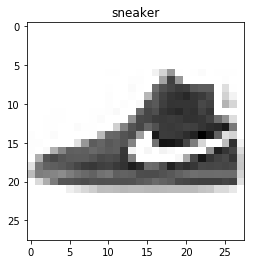

In [52]:
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()


## 1) Data preprocessing

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train/255.
X_test_norm = X_test/255.

X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 28, 28, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 28, 28, 1)


In [34]:
X_train_norm.shape

(60000, 28, 28, 1)

Créons dorénavant l'architecture LeNet sur ce projet afin de voir si les résultats sont cohérents

In [35]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, name='C1', kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu', name='C5'))
    # Layer F6
    model.add(Dense(units=84, activation='relu', name='F6'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model


In [36]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

model = lenet5()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

# Finally fit the model
model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=100, batch_size=64, callbacks=callbacks)


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 243us/step - loss: 0.5983 - acc: 0.7807 - val_loss: 0.4405 - val_acc: 0.8378
Epoch 2/100
60000/60000 [==============================] - 17s 278us/step - loss: 0.4011 - acc: 0.8518 - val_loss: 0.3799 - val_acc: 0.8621
Epoch 3/100
60000/60000 [==============================] - 16s 274us/step - loss: 0.3491 - acc: 0.8718 - val_loss: 0.3599 - val_acc: 0.8678
Epoch 4/100
60000/60000 [==============================] - 17s 290us/step - loss: 0.3197 - acc: 0.8822 - val_loss: 0.3374 - val_acc: 0.8809
Epoch 5/100
60000/60000 [==============================] - 16s 267us/step - loss: 0.2983 - acc: 0.8893 - val_loss: 0.3389 - val_acc: 0.8748
Epoch 6/100
60000/60000 [==============================] - 16s 268us/step - loss: 0.2838 - acc: 0.8946 - val_loss: 0.3133 - val_acc: 0.8843
Epoch 7/100
60000/60000 [==============================] - 20s 326us/step - loss: 0.2662 - acc: 0.9006 - val_l

Etant sur un modèle multiclasse, nous décidons d'utiliser la moyenne comme scoring

In [37]:

print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat)[1])


60000/60000 [==============================] - 8s 132us/step
accuracy on train with NN: 0.9566
10000/10000 [==============================] - 1s 132us/step
accuracy on test with NN: 0.8991


Nos résultats sont vraiment bons! L'algorithme arrive à reconnaitre 9 images sur 10 ce qui représente un excellent résultat. Néanmoins, allons plus loin, et créons artificiellement des images. Cela nous permettra de combattre notre overfitting.

In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=10)

In [39]:
datagen.fit(X_train_norm)

In [40]:
model = lenet5()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

batch_size = 64
model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
                    validation_data=(X_test_norm, y_test_cat), callbacks=callbacks,
                    steps_per_epoch=len(X_train_norm) / batch_size, epochs=100)

Epoch 1/100
938/937 [==============================] - 18s 19ms/step - loss: 0.6575 - acc: 0.7587 - val_loss: 0.4906 - val_acc: 0.8186
Epoch 2/100
938/937 [==============================] - 21s 22ms/step - loss: 0.4418 - acc: 0.8353 - val_loss: 0.4255 - val_acc: 0.8488
Epoch 3/100
938/937 [==============================] - 21s 22ms/step - loss: 0.3887 - acc: 0.8566 - val_loss: 0.4007 - val_acc: 0.8536
Epoch 4/100
938/937 [==============================] - 22s 23ms/step - loss: 0.3613 - acc: 0.8645 - val_loss: 0.3780 - val_acc: 0.8639
Epoch 5/100
938/937 [==============================] - 22s 23ms/step - loss: 0.3418 - acc: 0.8737 - val_loss: 0.3795 - val_acc: 0.8567
Epoch 6/100
938/937 [==============================] - 21s 22ms/step - loss: 0.3266 - acc: 0.8792 - val_loss: 0.3512 - val_acc: 0.8717
Epoch 7/100
938/937 [==============================] - 22s 24ms/step - loss: 0.3149 - acc: 0.8822 - val_loss: 0.3592 - val_acc: 0.8729
Epoch 8/100
938/937 [==============================] - 

Voyons si grâce à cette méthode, nous arrivons à un score plus élevé?

In [15]:
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat)[1])

60000/60000 [==============================] - 8s 135us/step
accuracy on train with NN: 0.93875
10000/10000 [==============================] - 1s 125us/step
accuracy on test with NN: 0.9033


Le résultat s'améliore donc un peu plus malgré le fait qu'on ait pas réussi à combattre l'overfitting. Il faudra donc jouer un peu plus sur les paramètres ou peut-être labéliser plus de photos... Mais finalement pas si mal pour un début!